Project Details:
Legal Text Mining
This project is provided by ”Open Legal Data” and Dr. Malte Ostendorff.
# Introduction
Courts publish tens of thousands of decisions every year, yet most remain unread except by specialists.
Open Legal Data (openlegaldata.io) is an open-source, non-profit initiative that collects court decisions and
other legal information to turn this hidden trove into an open, machine-readable corpus. Open Legal Data
provides this corpus through a web interface, bulk downloads and a REST API. By doing so, Open Legal
Data aims to enhance the transparency of the jurisdiction with the help of open data and by supporting
people without legal education to understand the justice system, in line with the Open-Data Principles and
the Free Access to Law movement.
# Case Study Problem
By transforming raw legal text into structured evidence, the project shows how judicial and legislative
signals can be quantified, visualized, and explored to uncover trends, guide policy and practice, and open
new avenues for legal research - work that lies squarely at the intersection of data science and law.
# Case Study Material
In the Legal Text Mining project, you will receive a dataset provided by Open Legal Data. The dataset
consists of a pre-cleaned dump of court decisions enriched with basic metadata (court, chamber, date, ECLI,
citations).
# Case Study Core Tasks
In the summer school project, you will develop an analytic pipeline to discover insights hidden in the large
amount of legal text, for example:
• Topic & trend analysis:
tracing how climate-risk litigation or consumer-protection disputes evolve across time and jurisdictions;
• Citation and precedent networks:
mapping which judgments or legislative acts act as hubs and how influence propagates through the
legal system;
• Outcome modelling:
linking textual or structural features to damages, penalties, or success rates, and examining regional
or court-level disparities;

Install requires Libraries

In [1]:
!pip install -q datasets transformers scikit-learn pandas numpy matplotlib seaborn

I tried to load dataset directly throw kaggel dataset. 

In [3]:
import pandas as pd
import os

# Check files in the dataset
os.listdir("/kaggle/input/ecthrnaacl2021")


['dev.jsonl', 'test.jsonl', 'train.jsonl']

In [4]:
import pandas as pd

df_train = pd.read_json("/kaggle/input/ecthrnaacl2021/train.jsonl", lines=True)
df_train.head()


,case_id,case_no,title,judgment_date,facts,applicants,defendants,allegedly_violated_articles,violated_articles,court_assessment_references,silver_rationales,gold_rationales
0,001-59587,25702/94,CASE OF K. AND T. v. FINLAND,2001-07-12,[11. At the beginning of the events relevant ...,"[K., T.]",[FINLAND],"[13, 8]",[8],"{'8': ['12', '140', '155', '156', '157', '158'...","[1, 13, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",[]
1,001-59591,42527/98,CASE OF PRINCE HANS-ADAM II OF LIECHTENSTEIN v...,2001-07-12,[9. The applicant is the monarch of Liechtens...,[PRINCE HANS-ADAM II OF LIECHTENSTEIN],[GERMANY],"[14, P1-1, 6]",[],"{'6': ['12', '15', '24', '25', '26', '27', '28...","[3, 6]",[]
2,001-59590,33071/96,CASE OF MALHOUS v. THE CZECH REPUBLIC,2001-07-12,[9. In June 1949 plots of agricultural land o...,[MALHOUS],[CZECH REPUBLIC],[6],[6],"{'6': ['13', '14', '35', '40', '41', '42', '43...","[4, 5]",[]
3,001-59588,29032/95,CASE OF FELDEK v. SLOVAKIA,2001-07-12,"[8. In 1991 Mr Dušan Slobodník, a research wo...",[FELDEK],[SLOVAKIA],"[14, 10, 9]",[10],{'10': ['35']},[27],[]
4,001-59589,44759/98,CASE OF FERRAZZINI v. ITALY,2001-07-12,"[9. The applicant is an Italian citizen, born...",[FERRAZZINI],[ITALY],"[14, 6]",[],"{'6': ['13', '14', '35', '40', '41', '42', '43...",[4],[]


In [5]:
import pandas as pd

df_dev = pd.read_json("/kaggle/input/ecthrnaacl2021/dev.jsonl", lines=True)
df_dev.head()


,case_id,case_no,title,judgment_date,facts,applicants,defendants,allegedly_violated_articles,violated_articles,court_assessment_references,silver_rationales,gold_rationales
0,001-160404,20488/11,CASE OF KOSIŃSKI v. POLAND,2016-02-09,[5. The applicant was born in 1983 and is det...,[KOSIŃSKI],[POLAND],[8],[],{},[],[]
1,001-160406,61050/11,CASE OF MESCEREACOV v. THE REPUBLIC OF MOLDOVA,2016-02-09,[5. The applicant was born in 1982 and is cur...,[MESCEREACOV],[MOLDOVA],[3],[3],"{'3': ['10', '11', '9']}","[4, 5, 6]",[]
2,001-160417,40852/05,CASE OF SHLYCHKOV v. RUSSIA,2016-02-09,[5. The applicant was born in 1955 and lives ...,[SHLYCHKOV],[RUSSIA],"[3, 6]","[6, 3]","{'3': ['18', '24', '27', '34', '37', '47'], '6...","[10, 12, 13, 14, 19, 22, 29, 32]",[]
3,001-160432,38395/12,CASE OF DALLAS v. THE UNITED KINGDOM,2016-02-11,[6. The applicant was born in 1977 and lives ...,[DALLAS],[UNITED KINGDOM],[7],[],"{'7': ['10', '11', '27', '29', '30', '31', '32...","[2, 3, 4, 5, 21, 23, 24, 25, 26, 27, 28, 31, 3...",[]
4,001-160425,42534/09,"CASE OF MITROVA AND SAVIK v. ""THE FORMER YUGOS...",2016-02-11,[6. The applicants were born in 1983 and 2007...,"[MITROVA, SAVIK]",[FORMER YUGOSLAV MACEDONIA],"[11, 5, 6, 8]",[],"{'11': ['67', '68', '69', '70', '71', '72', '7...",[],[]


In [6]:
df_test = pd.read_json("/kaggle/input/ecthrnaacl2021/test.jsonl", lines=True)
df_test.head(5)


,case_id,case_no,title,judgment_date,facts,applicants,defendants,allegedly_violated_articles,violated_articles,court_assessment_references,silver_rationales,gold_rationales
0,001-177349,21272/12,CASE OF BECKER v. NORWAY,2017-10-05,"[5. The applicant is a journalist for DN.no, ...",[BECKER],[NORWAY],[10],[10],"{'10': ['11', '12', '13', '14', '15', '16', '1...","[1, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18...",[]
1,001-177341,33015/06,CASE OF VOSKOBOYNIKOV v. UKRAINE,2017-10-05,[5. The applicant was born in 1940 and lives ...,[VOSKOBOYNIKOV],[UKRAINE],"[13, 8]",[8],"{'8': ['27', '28'], '13': ['22']}",[17],[]
2,001-177354,45758/14,CASE OF BERÁNEK v. THE CZECH REPUBLIC,2017-10-05,[5. The applicant was born in 1965 and lives ...,[BERÁNEK],[CZECH REPUBLIC],[6],[6],{'6': ['12']},[7],[]
3,001-177342,32598/07,CASE OF SUKHANOV v. UKRAINE,2017-10-05,[5. The applicant was born in 1967 and lives ...,[SUKHANOV],[UKRAINE],[6],[6],"{'6': ['10', '11', '12', '15', '18', '9']}","[4, 5, 6, 7]",[]
4,001-177355,34197/15,CASE OF MITEV v. BULGARIA,2017-10-05,[5. The applicant was born in 1967 and lives ...,[MITEV],[BULGARIA],"[13, 3, 6]",[],"{'6': ['10', '11', '12', '15', '18', '9']}","[4, 5, 6, 7, 10, 13]",[]


Lets check columns

Inshortly check just columns name of this dataset.

In [7]:
df_train.columns


Index(['case_id', 'case_no', 'title', 'judgment_date', 'facts', 'applicants',
       'defendants', 'allegedly_violated_articles', 'violated_articles',
       'court_assessment_references', 'silver_rationales', 'gold_rationales'],
      dtype='object')

In [8]:
df_test.columns

Index(['case_id', 'case_no', 'title', 'judgment_date', 'facts', 'applicants',
       'defendants', 'allegedly_violated_articles', 'violated_articles',
       'court_assessment_references', 'silver_rationales', 'gold_rationales'],
      dtype='object')

In [9]:
df_dev.columns

Index(['case_id', 'case_no', 'title', 'judgment_date', 'facts', 'applicants',
       'defendants', 'allegedly_violated_articles', 'violated_articles',
       'court_assessment_references', 'silver_rationales', 'gold_rationales'],
      dtype='object')

In [10]:

print("Number of cases:", df_train.shape[0])
print("Columns:", df_train.columns)
print(df_train.info())


Number of cases: 9000
Columns: Index(['case_id', 'case_no', 'title', 'judgment_date', 'facts', 'applicants',
       'defendants', 'allegedly_violated_articles', 'violated_articles',
       'court_assessment_references', 'silver_rationales', 'gold_rationales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   case_id                      9000 non-null   object
 1   case_no                      9000 non-null   object
 2   title                        9000 non-null   object
 3   judgment_date                9000 non-null   object
 4   facts                        9000 non-null   object
 5   applicants                   9000 non-null   object
 6   defendants                   9000 non-null   object
 7   allegedly_violated_articles  9000 non-null   object
 8   violated_articles            9000 n

shape : total rows & columns (9000 rows, 12 columns)

info() : column types, null values, memory usage

note: Always check dataset shape and types before analysis. Helps avoid errors in preprocessing.

In [16]:
#Combine text columns safely
df_train['text'] = (
    df_train['facts'].astype(str) + " " +
    df_train['silver_rationales'].astype(str) + " " +
    df_train['gold_rationales'].astype(str)
)

# Check combined text
df_train[['text']].head(20)


,text
0,['11. At the beginning of the events relevant...
1,['9. The applicant is the monarch of Liechten...
2,['9. In June 1949 plots of agricultural land ...
3,"['8. In 1991 Mr Dušan Slobodník, a research w..."
4,"['9. The applicant is an Italian citizen, bor..."
5,['12. In 1987 the applicant association publi...
6,['7. The applicants are former members of the...
7,['7. The circumstances in which the applicant...
8,['11. On 29 April 1962 the applicant married ...
9,"['7. The applicant is a Lithuanian national, ..."


NLP models need a single text column

Combining facts, silver_rationales, gold_rationales gives more context for analysis

facts means raw case description

silver_rationales means AI explanation

gold_rationales means human explanation

Combining ensures both human & AI reasoning is included.

In [26]:
#For easy understand , Create Binary (0 and 1) Outcome Column
# If `violated_articles` is non-empty then violation occurred : 
df_train['outcome'] = df_train['violated_articles'].apply(lambda x: 1 if len(x) > 2 else 0)

# Check outcome: 
df_train['outcome'].value_counts()


outcome
0    8347
1     653
Name: count, dtype: int64

outcome = 1 - At least one violation confirmed by the court

outcome = 0 - No violation

This is our label for modeling

Why not allegedly_violated_articles? Because those are claims, not verified outcomes

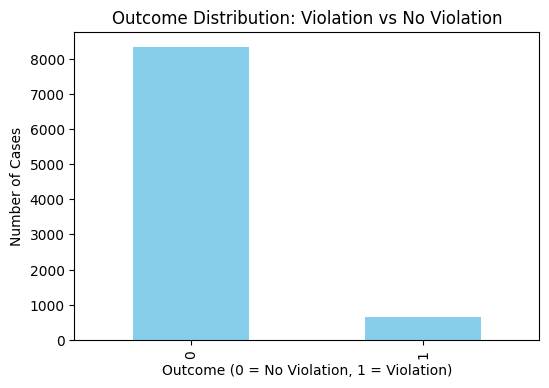

In [27]:
#Violation vs no violation Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df_train['outcome'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Outcome Distribution: Violation vs No Violation")
plt.xlabel("Outcome (0 = No Violation, 1 = Violation)")
plt.ylabel("Number of Cases")
plt.show()


Visualizes class balance - useful before modeling

Shows how many cases have violations vs no violations

Helps decide if we need techniques to handle imbalance

count     9000.000000
mean      1618.427778
std       1988.859547
min         71.000000
25%        483.000000
50%        986.500000
75%       2001.250000
max      35379.000000
Name: text_length, dtype: float64


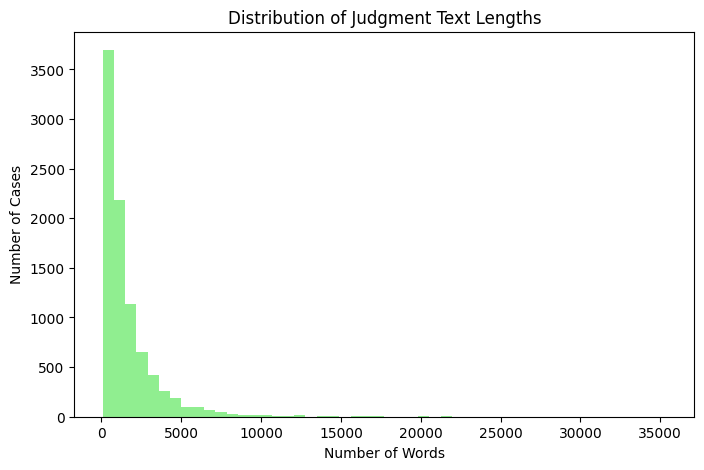

In [28]:
#Text Length Analysis
# Count number of words in each judgment
df_train['text_length'] = df_train['text'].astype(str).apply(lambda x: len(x.split()))

# Basic stats
print(df_train['text_length'].describe())

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df_train['text_length'], bins=50, color='lightgreen')
plt.title("Distribution of Judgment Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Cases")
plt.show()


Legal judgments are different in length - some are 50 words, some 20,000 words

Models like BERT have token limits - important to know length

Helps decide preprocessing: truncation, padding, or splitting long cases

Top 10 Most Frequently Violated Articles:
6: 4704 cases
P1-1: 1421 cases
5: 1368 cases
3: 1349 cases
13: 1238 cases
8: 710 cases
2: 505 cases
10: 291 cases
14: 141 cases
11: 110 cases


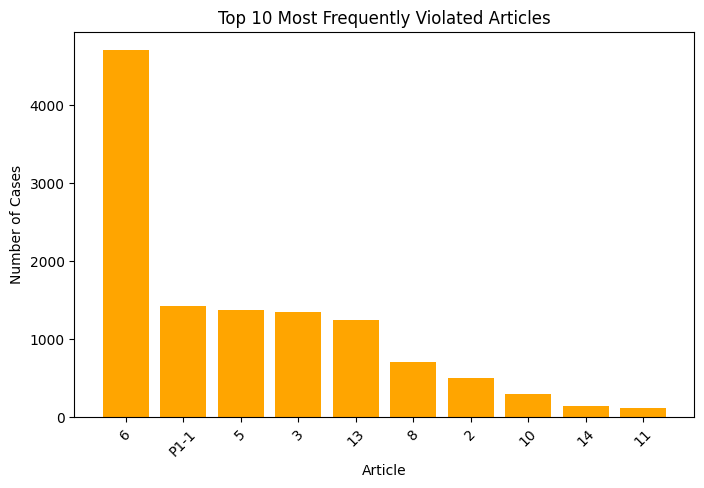

In [29]:
# Flatten all violated articles into a single list
from collections import Counter
all_articles = [article for sublist in df_train['violated_articles'] for article in sublist]

# Count frequency
article_counter = Counter(all_articles)
top_articles = article_counter.most_common(10)

# Print top 10
print("Top 10 Most Frequently Violated Articles:")
for article, count in top_articles:
    print(f"{article}: {count} cases")

# Plot top 10 articles
articles, counts = zip(*top_articles)
plt.figure(figsize=(8,5))
plt.bar(articles, counts, color='orange')
plt.title("Top 10 Most Frequently Violated Articles")
plt.xlabel("Article")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()


Shows which articles are most commonly violated - useful for legal research

allegedly_violated_articles can be compared later to check accuracy of claims

Plots make it easy to present findings in reports or LinkedIn

In [30]:
# Step 8: Portfolio-Ready Summary

print("""
Notebook 01 Summary:
-------------------
- Dataset: df_train from ecthrnaacl2021
- Total cases: {}
- Columns: {}
- Outcome distribution (0 = No Violation, 1 = Violation): {}
- Text length (words per judgment): mean {:.1f}, min {}, max {}
- Top 10 violated articles: {}
""".format(
    df_train.shape[0],
    list(df_train.columns),
    df_train['outcome'].value_counts().to_dict(),
    df_train['text_length'].mean(),
    df_train['text_length'].min(),
    df_train['text_length'].max(),
    top_articles
))



Notebook 01 Summary:
-------------------
- Dataset: df_train from ecthrnaacl2021
- Total cases: 9000
- Columns: ['case_id', 'case_no', 'title', 'judgment_date', 'facts', 'applicants', 'defendants', 'allegedly_violated_articles', 'violated_articles', 'court_assessment_references', 'silver_rationales', 'gold_rationales', 'text', 'outcome', 'text_length']
- Outcome distribution (0 = No Violation, 1 = Violation): {0: 8347, 1: 653}
- Text length (words per judgment): mean 1618.4, min 71, max 35379
- Top 10 violated articles: [('6', 4704), ('P1-1', 1421), ('5', 1368), ('3', 1349), ('13', 1238), ('8', 710), ('2', 505), ('10', 291), ('14', 141), ('11', 110)]

